In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.tsv', sep = '\t')
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."


In [3]:
train

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
...,...,...,...,...,...,...,...,...
1482528,1482528,Victoria's Secret Tankini Sz. Large,2,Women/Athletic Apparel/Sports Bras,Victoria's Secret,18.0,1,Purple and Paisley Victoria's Secret Tankini S...
1482529,1482529,Men's UA [rm],2,Men/Athletic Apparel/Shirts & Tops,Under Armour,34.0,0,[rm] for the set both in perfect condition no ...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl..."
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape."


In [4]:
train.shape

(1185795, 8)

In [5]:
train.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185795 entries, 0 to 1482533
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1185795 non-null  int64  
 1   name               1185795 non-null  object 
 2   item_condition_id  1185795 non-null  int64  
 3   category_name      1180745 non-null  object 
 4   brand_name         679751 non-null   object 
 5   price              1185795 non-null  float64
 6   shipping           1185795 non-null  int64  
 7   item_description   1185792 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 81.4+ MB


In [7]:
train.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          5050
brand_name           506044
price                     0
shipping                  0
item_description          3
dtype: int64

As we can see category_name, brand_name, and item_description have missing values

so i will be droping all th rows of this columns having missing values so that it wont effect the model later.

In [8]:
train = train.dropna()
train

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
11,11,New vs pi k body mists,1,Beauty/Fragrance/Women,Victoria's Secret,34.0,0,(5) new vs pink body mists (2.5 oz each) Fresh...
12,12,Black Skater dress,2,"Women/Dresses/Above Knee, Mini",rue,16.0,0,"Xl, great condition"
13,13,Sharpener and eraser,1,Other/Office supplies/School Supplies,Scholastic,4.0,1,No description yet
...,...,...,...,...,...,...,...,...
1482523,1482523,NARS illuminator orgasm,3,Beauty/Makeup/Face,Nars,8.0,0,Still more than half left in this! Color is or...
1482524,1482524,Penn State Jogger Sweatpants,2,Women/Athletic Apparel/Tracksuits & Sweats,Nike,26.0,0,▪️NWOT ▪️Perfect Condition ▪️Barely been worn ...
1482528,1482528,Victoria's Secret Tankini Sz. Large,2,Women/Athletic Apparel/Sports Bras,Victoria's Secret,18.0,1,Purple and Paisley Victoria's Secret Tankini S...
1482529,1482529,Men's UA [rm],2,Men/Athletic Apparel/Shirts & Tops,Under Armour,34.0,0,[rm] for the set both in perfect condition no ...


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677428 entries, 1 to 1482530
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   train_id           677428 non-null  int64  
 1   name               677428 non-null  object 
 2   item_condition_id  677428 non-null  int64  
 3   category_name      677428 non-null  object 
 4   brand_name         677428 non-null  object 
 5   price              677428 non-null  float64
 6   shipping           677428 non-null  int64  
 7   item_description   677428 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 46.5+ MB


In [10]:
train.describe()

,train_id,item_condition_id,price,shipping
count,6.774280e+05,677428.000000,677428.000000,677428.000000
mean,7.410965e+05,2.034579,30.936897,0.389138
std,4.278805e+05,0.902309,44.831767,0.487555
min,1.000000e+00,1.000000,0.000000,0.000000
25%,3.706348e+05,1.000000,12.000000,0.000000
50%,7.403985e+05,2.000000,20.000000,0.000000
75%,1.111714e+06,3.000000,34.000000,1.000000
max,1.482530e+06,5.000000,2009.000000,1.000000


In [11]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
train.shape, test.shape

((1185746, 8), (296789, 8))

Text(0.5, 1.0, 'Price Distribution')

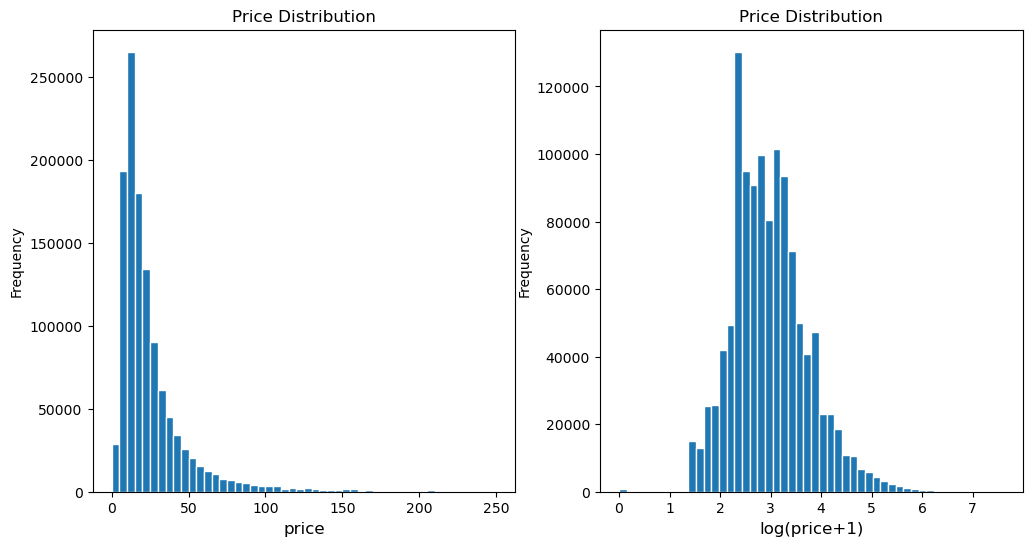

In [12]:
plt.subplot(1, 2, 1)
(train['price']).plot.hist(bins=50, figsize=(12, 6), edgecolor = 'white', range = [0, 250])
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)
plt.subplot(1, 2, 2)
np.log(train['price']+1).plot.hist(bins=50, figsize=(12,6), edgecolor='white')
plt.xlabel('log(price+1)', fontsize=12)
plt.title('Price Distribution', fontsize=12)

In [13]:
#Over 55% of items shipping fee were paid by the buyers.
train['shipping'].value_counts() / len(train)

0    0.55269
1    0.44731
Name: shipping, dtype: float64

In [14]:
shipping_fee_by_buyer = train.loc[df['shipping'] == 0, 'price']
shipping_fee_by_seller = train.loc[df['shipping'] == 1, 'price']
print('The average price is {}'.format(round(shipping_fee_by_seller.mean(), 2)), 'if seller pays shipping');
print('The average price is {}'.format(round(shipping_fee_by_buyer.mean(), 2)), 'if buyer pays shipping')

The average price is 22.56 if seller pays shipping
The average price is 30.1 if buyer pays shipping


In [15]:
print('There are', train['category_name'].nunique(), 'unique values in category name column')

There are 1270 unique values in category name column


<Axes: xlabel='item_condition_id', ylabel='price'>

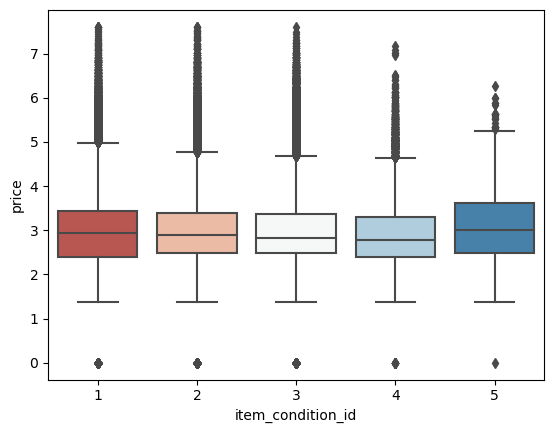

In [16]:
sns.boxplot(x = 'item_condition_id', y = np.log(train['price']+1), data = train, palette = sns.color_palette('RdBu',5))

In [17]:
train

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...
...,...,...,...,...,...,...,...,...
1482529,1482529,Men's UA [rm],2,Men/Athletic Apparel/Shirts & Tops,Under Armour,34.0,0,[rm] for the set both in perfect condition no ...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl..."
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape."
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...


In [18]:
train.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [19]:
NUM_BRANDS = 10 
NUM_CATEGORIES = 20

def handle_missing_inplace(dataset): 
    dataset['category_name'].fillna(value='missing', inplace=True) 
    dataset['brand_name'].fillna(value='missing', inplace=True) 
    dataset['item_description'].replace('No description yet', 'missing', inplace=True)  # Separate .replace() calls
    dataset['item_description'].fillna(value='missing', inplace=True)

def cutting(dataset):
    pop_brand = dataset['brand_name'].value_counts().loc[lambda x: x.index != 'missing'].index[:NUM_BRANDS]
    dataset.loc[~dataset['brand_name'].isin(pop_brand), 'brand_name'] = 'missing'
    pop_category = dataset['category_name'].value_counts().loc[lambda x: x.index != 'missing'].index[:NUM_CATEGORIES]

def to_categorical(dataset):
    dataset['category_name'] = dataset['category_name'].astype('category')
    dataset['brand_name'] = dataset['brand_name'].astype('category')
    dataset['item_condition_id'] = dataset['item_condition_id'].astype('category')


droping the price with zero

In [20]:
df = pd.read_csv('train.tsv', sep = '\t')
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
test_new = test.drop('price', axis=1)
y_test = np.log1p(test["price"])
train = train[train.price != 0].reset_index(drop=True)

In [21]:
#Merging train and test data
nrow_train = train.shape[0]
y = np.log1p(train["price"])
merge: pd.DataFrame = pd.concat([train, test_new])

In [22]:
handle_missing_inplace(merge)
cutting(merge)
to_categorical(merge)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

NAME_MIN_DF = 2
cv_name = CountVectorizer(min_df=NAME_MIN_DF)
X_name = cv_name.fit_transform(merge['name'])

# Count vectorize category_name column.
cv_category = CountVectorizer()
X_category = cv_category.fit_transform(merge['category_name'])


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [26]:

MAX_FEATURES_ITEM_DESCRIPTION = 1000 
# TF-IDF vectorize item_description column.
tv = TfidfVectorizer(max_features=MAX_FEATURES_ITEM_DESCRIPTION, ngram_range=(1, 3), stop_words='english')
X_description = tv.fit_transform(merge['item_description'])


In [28]:
from sklearn.preprocessing import LabelBinarizer
#Label binarize brand_name column.
lb = LabelBinarizer(sparse_output=True)
X_brand = lb.fit_transform(merge['brand_name'])

In [30]:
from scipy.sparse import csr_matrix
#Create dummy variables for item_condition_id and shipping columns.
X_dummies = csr_matrix(pd.get_dummies(merge[['item_condition_id', 'shipping']], sparse=True).values)

In [32]:
from scipy.sparse import hstack
#Create sparse merge.
sparse_merge = hstack((X_dummies, X_description, X_brand, X_category, X_name)).tocsr()

In [33]:
#Remove features with document frequency <=1.
mask = np.array(np.clip(sparse_merge.getnnz(axis=0) - 1, 0, 1), dtype=bool)
sparse_merge = sparse_merge[:, mask]

In [34]:
#Separate train and test data from sparse merge.
X = sparse_merge[:nrow_train]
X_test = sparse_merge[nrow_train:]

In [38]:
pip install lightgbm


     ---------------------------------------- 1.3/1.3 MB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [39]:
import lightgbm as lgb

train_X = lgb.Dataset(X, label=y)

In [40]:
params = {
        'learning_rate': 0.75,
        'application': 'regression',
        'max_depth': 3,
        'num_leaves': 100,
        'verbosity': -1,
        'metric': 'RMSE',
    }

In [46]:
# Train the LightGBM model
gbm = lgb.train(params, train_set=train_X, num_boost_round=3200)


In [47]:

#predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [48]:
from sklearn.metrics import mean_squared_error
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

The rmse of prediction is: 0.46723389169535356
